<a href="https://colab.research.google.com/github/Ashif-khan033/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution 1**    - Mohd Ashif Khan
##### **Contribution 2**    - Mayank Belwal
##### **Contribution 3**    - Shubhangini Ganguli


# **Project Summary -**

1.The goal of the project was to analyze and cluster Netflix movies and TV shows based on their genre, director,cast,country and description, and to develop a recommender system that recommends movies and TV shows based on user preferences.

2.The project used a dataset of Netflix movies and TV shows.The dataset contained information such as the title, director, cast, country, date added, release year, rating, and genre of each movie and TV show.

3.The project first performed data cleaning and preprocessing on the dataset. This included handling missing values, converting data types, and creating new features..

4.The project then used unsupervised machine learning techniques such as k-means clustering and hierarchical clustering to cluster the movies and TV shows based on their genre,director,cast,country and description.

5.The project also developed a content-based recommender system that recommends movies and TV shows based on their similarity to other movies and TV shows.

6.The content-based recommender system used features such as genre, director, cast to compute the similarity between movies and TV shows. The similarity was measured using cosine similarity, which measures the cosine of the angle between two vectors in a high-dimensional space.

7.Finally the project demonstrated the usefulness of unsupervised machine learning techniques for analyzing and clustering large datasets of movies and TV shows, as well as the effectiveness of content-based recommender systems for providing personalized recommendations based on user preferences.

# **GitHub Link -**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do:

1.Exploratory Data Analysis

2.Understanding what type content is available in different countries

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [8]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import missingno as msno

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [10]:
# Load Dataset
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone_Project_4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [11]:
recommender_df = df.copy()

In [12]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
print(f'Number of rows in datasets are {df.shape[0]}')
print(f'Number of columns in datasets are {df.shape[1]}')

Number of rows in datasets are 7787
Number of columns in datasets are 12


### Dataset Information

In [14]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
print(f'Duplicates entries in datasets are {df.duplicated().sum()}')

Duplicates entries in datasets are 0


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

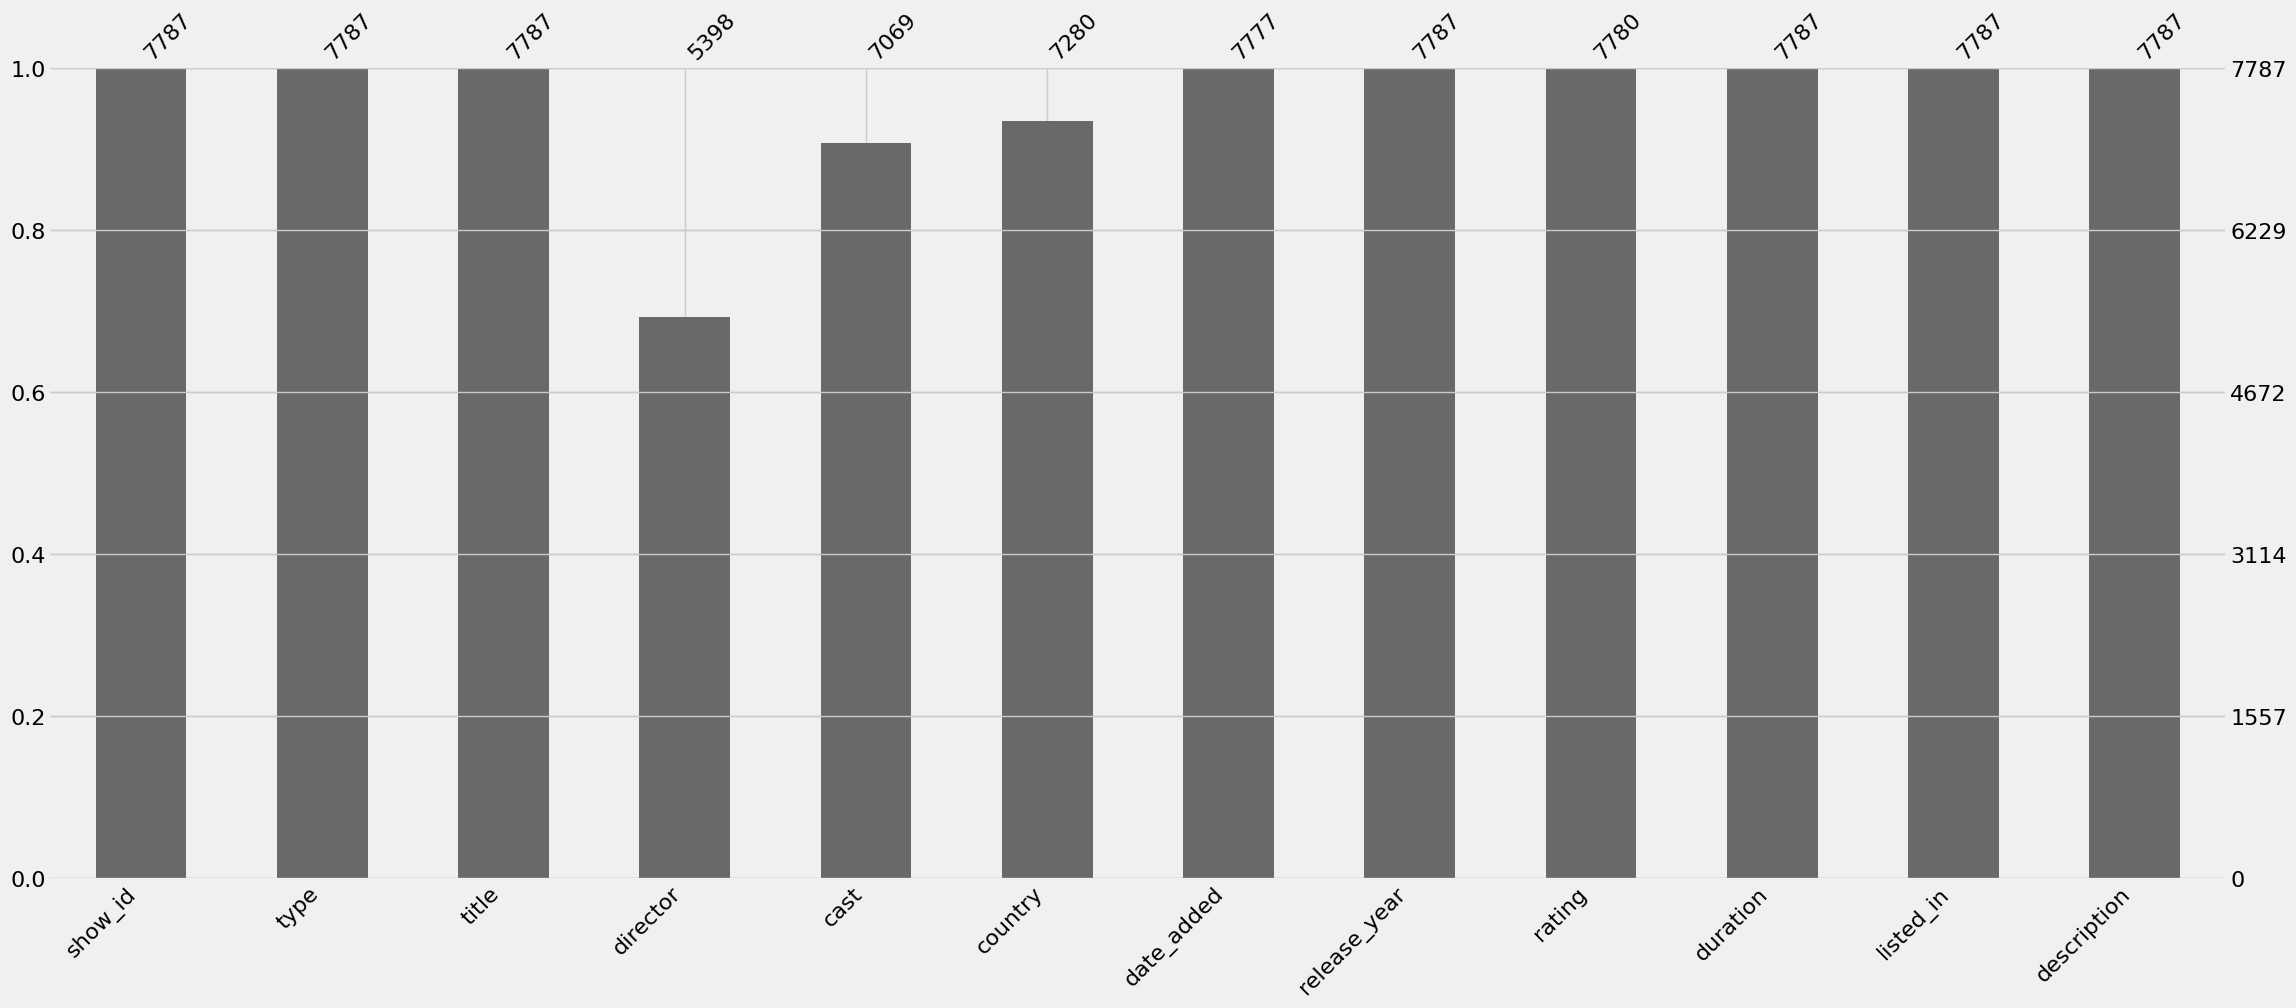

In [17]:
# Visualizing the missing values
msno.bar(df)
plt.show()

### What did you know about your dataset?

* There are 7787 rows and 12 columns present in dataset.

* Datatypes of variables present in datasets are object as well as integer.

* There is no duplicate entries in the dataset.

* There are missing values present in the column director,cast,country and rating

#### Missing Values Imputation

In [18]:
# Replacing missing values in the director, cast, and country column with 'Unknown'
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

# Replacing the missing values present in rating column with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the missing value present in date_added column
df.dropna(axis=0, inplace = True)

In [19]:
clean_df = df[df != 'Unknown'].dropna()

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
# Dataset Describe
df.describe()

,release_year
count,7777.000000
mean,2013.935965
std,8.760694
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000
